## Based on CRTS_sel_g_cut_vs_r_cut.ipynb,   taking only the code needed to make Fig. 3

A testbed for making Fig.3 :  the 4 x 4 histogram plot. It shows that   0   < log(tau) < 1.7 (short timescales bin), does not exhibit any variability, because chi_ij for qso and stars is almost undistinguishable for uncorrected points. 



** What happens here : **

We run the cells below for different magnitude  cuts (changing Min and  Max  parameters below) :  17-18 ,  18-18.5 ,  18.5-19.  

Each run reads in xi, ei points for quasars  , blue stars.  We read in xi (mi  : magnitude  difference) , tau (time difference),   ei (magnitude difference error)  points separately for 4 timescale bins in log(delta t)  space . 

A list of xi, tau,  ei  per magnitude per timescale per object type (quasar or a star) is saved as a .txt file in the folder structure data_products/Fig_3_data/year-month-day/r_cut_Min-Max_object_mi_tau_ei_log_tau_min_max.txt 


Then we read in each xi,tau,ei file,  and  for every point in a given  magnitude-timescale-object bin we calculate  chi quantity.   Thus we make a histogram of chi values for magnitude-timescale-object grid, resulting in  a  4 x 3 x 2  histograms .  The robust width of the chi distribution for each bin is a signature of intrinsic variability. 


In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from astroML.stats import median_sigmaG
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
import CRTS_paper_modules as mod
import datetime


In [2]:
cols1, qso_cat = mod.get_qso_catalog() 
cols2 , star_cat= mod.get_stars_catalog()


Zipping CRTS-SDSS quasars catalog from ../data_products/CRTS_SDSS_catalogs/CRTS_SDSS_cross_matched_qso_DB_QSO_catalog.txt
Read in 7601 quasars from CRTS
zipping CRTS-SDSS stars catalog...
Read in catalog for 48250 stars from CRTS 


##  {mag_ranges} x {object_types} x { quantities } x {delta_t_bins}

In [15]:
# Make it in a loop : 
# Loop over all magnitude ranges,
# at each range reading in xi, ei 
# for QSO and blue stars 

# Subsequently, save  these arrays 
# of xi, ei  , grouped into 
# four delta_t  bins 

inDirStars   = '../data_products/sf_file_per_LC/stars/'
inDirQSO = '../data_products/sf_file_per_LC/qso/'

###  set the output directory  to save the results...
outDir = os.path.join(os.getcwd()[:-4]+'data_products/'+'Fig_3_data/')
if not os.path.exists(outDir): os.system('mkdir %s' % outDir)
                      
outDir = os.path.join(os.getcwd()[:-4],'data_products/'+'Fig_3_data', 
                      datetime.datetime.now().strftime('%Y-%m-%d')+ '/')
if not os.path.exists(outDir): os.system('mkdir %s' % outDir)

print('Today we will save our Fig_3 files in %s'%outDir)

# loop over magnitudes ...
for Min, Max in zip([17,18,18.5], [18,18.5, 19]):
    
    # select objects that satisfy magnitude cut ... 
    cut_mag = 'r'
    print('\nUsing now only lightcurves with SDSS  %f< %s < %f' % (Min, cut_mag, Max))

    good_ids_S_blue = mod.cut_stars(star_cat = star_cat, mMin = Min, 
                                    mMax=Max, mErrMax = 0.3, gi_Min = -1,  
                                    gi_Max=1, cut_mag=cut_mag + '_mMed')
    good_ids_QSO = mod.cut_qso(qso_cat = qso_cat, mMin = Min, 
                               mMax=Max, mErrMax = 0.3, 
                                cut_mag=cut_mag)
    out_dic = {}

    # read xi, ei the fastest way for selected objects 
    out_dic['qso'] = mod.faster_read_xi_ei(inDirSF = inDirQSO,
                                           good_ids = good_ids_QSO )
    out_dic['starsB'] = mod.faster_read_xi_ei(inDirSF = inDirStars,
                                              good_ids = good_ids_S_blue )
    
    # split into four log(delta_t) bins , and save in an
    # appropriate directory 
    log_tau_min = [0,   2.3, 2.8, 3.2]
    log_tau_max = [1.7, 2.5, 3.0, 3.4]
    
    ## Save to a file points for log(tau) samples  for QSO, stars 
    for obj in out_dic.keys():
        m_ij = out_dic[obj]['xi']
        tau =  out_dic[obj]['tau']
        e_ij =  out_dic[obj]['ei']

        for i in range(len(log_tau_min)):
            # select those points that fall into given
            # delta  t  bin 
            m1 = log_tau_min[i] < np.log10(tau)
            m2 = np.log10(tau) < log_tau_max[i]
            mask =  m1 * m2 
            
            data = np.column_stack((m_ij[mask], tau[mask], e_ij[mask]))

            fname = str(Min)+'-'+str(Max)+'_'+obj+'_mi_tau_ei-log_t_'+\
                    str(log_tau_min[i])+'-'+str(log_tau_max[i])+'.txt'
            print('Saved %s' % fname)
            np.savetxt(outDir+fname, data, fmt='%s', delimiter= ' ')



Today we will save our Fig_3 files in /Users/chris/GradResearch/CRTS_PROJECT/data_products/Fig_3_data/2017-08-08/

Using now only lightcurves with SDSS  17.000000< r < 18.000000

Choosing stars with  SDSS   -1.00<g-i<1.00
 These cuts reduced the number of stars  in the sample from 48250 to 2795

 Returning only QSO with  an SDSS counterpart within 2.000000 arcsec

 These cuts reduced the number of qso  in the sample from 7601 to 185

Reading in tau,xi,ei  for 185 objects

Using structure function master files from ../data_products/sf_file_per_LC/qso/
[##########] 100.00%
Finished reading all master files for the selected objects ...

Reading in tau,xi,ei  for 2795 objects

Using structure function master files from ../data_products/sf_file_per_LC/stars/
[##########] 100.00%
Finished reading all master files for the selected objects ...
Saved 17-18_qso_mi_tau_ei-log_t_0-1.7.txt
Saved 17-18_qso_mi_tau_ei-log_t_2.3-2.5.txt
Saved 17-18_qso_mi_tau_ei-log_t_2.8-3.0.txt
Saved 17-18_qso_mi_tau

--> Now go up, and change Min, Max to the next magnitude bin, until all options have been exhausted 

## Plotting the histogram grid for qso and starsB 

In [44]:
#outDir = os.path.join(os.getcwd()[:-4],'data_products/'+'Fig_3_data/2017-01-10/')
outDir

'/Users/chris/GradResearch/CRTS_PROJECT/data_products/Fig_3_data/2017-08-08/'

Note : if the files saved above already exist, can just rerun the cells below to remake the figure.

In [45]:
#Define function used to plot each histogram in the grid ... 

# Use today's data... 
# --> do not change the outDir 

# Use data from another day : 
#outDir = os.path.join(os.getcwd()[:-4],'data_products/'+'Fig_3_data/2016-06-07/')

def plot2Chistograms(chiQSO, chiSTAR, Xmin, Xmax, Ymin, Ymax, ax, bins=20, 
                     title='', axes_text_size=25):
    limits = [(Xmin, Xmax, Ymin, Ymax)]
    ax.set_xlim(Xmin, Xmax)
    ax.set_ylim(Ymin, Ymax)        
        
    #plt.tick_params(axis='both', which='major', labelsize=15)
    xTitle = Xmin + 0.05*(Xmax-Xmin)
    yTitle = Ymax - 0.2*(Ymax-Ymin)
    ax.text(xTitle, yTitle, title, fontsize=axes_text_size) # , fontsize=12 

    # plot a histogram
    ax.hist(chiSTAR, bins=bins, normed=True, facecolor='blue', 
            histtype='stepfilled', alpha=0.4)
    ax.hist(chiQSO, bins=bins, normed=True, facecolor='red', 
            histtype='stepfilled', alpha=0.2,  hatch="//")

    # plot the robust width of both distributions
    stdev_rob_QSO = 0.7414 *(np.percentile(chiQSO,75) - np.percentile(chiQSO,25) )
    stdev_rob_S = 0.7414 *(np.percentile(chiSTAR,75) - np.percentile(chiSTAR,25) )
    
    
    xTitle = Xmin + 0.65*(Xmax-Xmin)
    yTitle = Ymax - 0.2*(Ymax-Ymin)
    StarSigmaG = r'$'+str(stdev_rob_S)[:4]+'$'
    ax.text(xTitle, yTitle, StarSigmaG, fontsize=axes_text_size) #  fontsize=12
    
    
    xTitle = Xmin + 0.65*(Xmax-Xmin)
    yTitle = Ymax - 0.35*(Ymax-Ymin)
    QSOSigmaG = r'$'+str(stdev_rob_QSO)[:4]+'$'
    ax.text(xTitle, yTitle, QSOSigmaG, fontsize=axes_text_size) #  fontsize=12
    ax.tick_params(axis='x', pad=10)
    ax.locator_params(tight=True, nbins=4)
    
    
    #start, end = ax.get_xlim()
    #stepsize=5
    #ax.xaxis.set_ticks(np.arange(start, end, stepsize))
    
Min_arr = [17, 18, 18.5]
Max_arr = [18, 18.5, 19]
log_tau_min = [0,   2.3, 2.8, 3.2]
log_tau_max = [1.7, 2.5, 3.0, 3.4]
xlims_arr = [4.9,10,10,10]




\Plot the uncorrected histograms 

Note: because we are plotting histograms of hundreds of thousands of points, the plotting itself takes ~few minutes... If you need to tweak any details of the plot, set $\verb|testing=True|$. 

In [42]:
rcParams['text.usetex'] = True

saving plot to: /Users/chris/GradResearch/CRTS_PROJECT/data_products/Fig_3_data/2017-08-08/Fig_3_histogram_panels.png


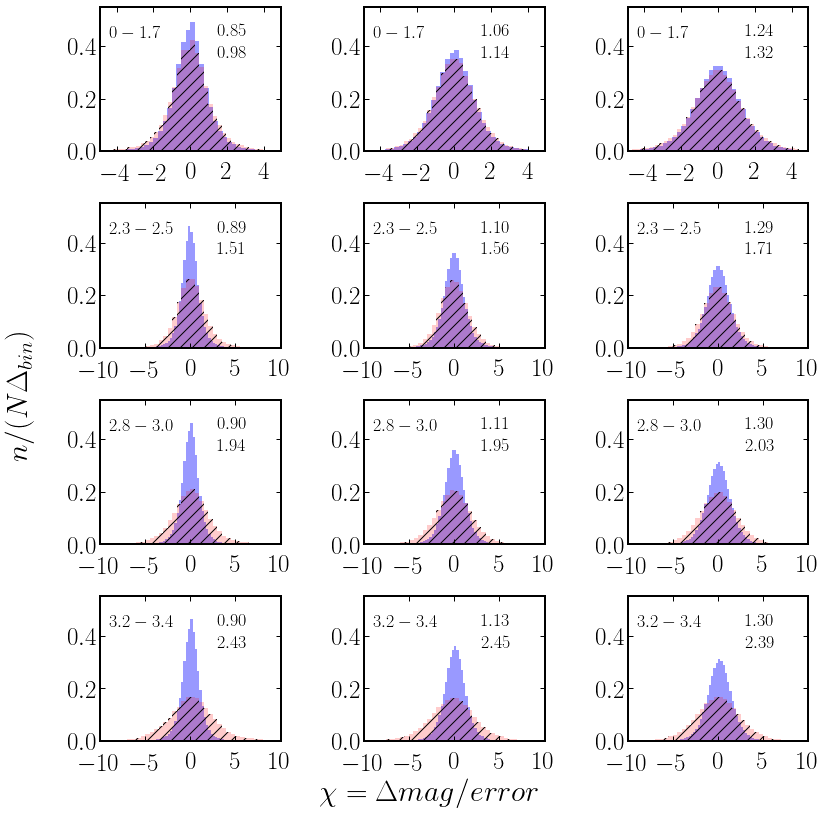

In [58]:
#import matplotlib 
#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15) 

from matplotlib import rcParams

rcParams['ytick.labelsize'] = 25
rcParams['xtick.labelsize'] = 25
#rcParams['axes.labelsize'] = 35
axes_label_font = 30 
#rcParams['font.size'] = 25
axes_text_size = 18
rcParams['axes.linewidth'] = 2
rcParams.update({'figure.autolayout': False})


%matplotlib inline

fig, axs = plt.subplots(4,3, figsize=(12,12))
# plot the same timescale-magnitude range before we get too specific... 
# if with one bin range it looks good, set testing = False, and run for all ... 

testing = False
if testing is True : 
    # just for testing  - load only 1/16 files (one for QSO one for Stars) and experiment with how it looks 
    j=0
    i=0

    datafileS = outDir+str(Min_arr[j])+'-'+str(Max_arr[j])+'_'+'starsB'+'_mi_tau_ei-log_t_'+\
                            str(log_tau_min[i])+'-'+str(log_tau_max[i])+'.txt'
    vS = np.loadtxt(datafileS, unpack=True)

    datafileQ = outDir+str(Min_arr[j])+'-'+str(Max_arr[j])+'_'+'qso'+'_mi_tau_ei-log_t_'+\
            str(log_tau_min[i])+'-'+str(log_tau_max[i])+'.txt'
    vQ = np.loadtxt(datafileQ, unpack=True)
    print('Read in the xi,tau,ei  data from \n %s and \n %s for testing...'%(datafileS, 
                                                                             datafileQ))
    
    
# initiate a storage array for the robust widths of chi distributions ... 
store_fc_starB = np.zeros((3,4))

for i in range(len(log_tau_max)):  # 
    for j in range(len(Min_arr) ):  # 
        
        #a = coeffs['a'][coeffs['rMagMin'] == Min_arr[j]]
        #b = coeffs['b'][coeffs['rMagMin'] == Min_arr[j]]
        #tau = (tau_max_arr[i] + tau_min_arr[i])/2.0
        #bin_fc = 1.0/ ( a* tau + b)
    
        if testing is not True: 
            datafileS = outDir+str(Min_arr[j])+'-'+str(Max_arr[j])+'_'+\
                'starsB'+'_mi_tau_ei-log_t_'+\
                str(log_tau_min[i])+'-'+str(log_tau_max[i])+'.txt'
            vS = np.loadtxt(datafileS, unpack=True)
        
            datafileQ = outDir +str(Min_arr[j])+'-'+str(Max_arr[j])+'_'+\
                'qso'+'_mi_tau_ei-log_t_'+\
                 str(log_tau_min[i])+'-'+str(log_tau_max[i])+'.txt'
            vQ = np.loadtxt(datafileQ, unpack=True)
        
        # calculate the robust width of the chi distribution .... 
        #chiS = vS[0]/(bin_fc*vS[2]) # applying the error correction : ei_corr = fc * ei 
        chiS = vS[0] / vS[2]
        chiSok = chiS[np.abs(chiS)<5]
        stdev_rob_S = 0.7414 *(np.percentile(chiSok,75) - np.percentile(chiSok,25) )
        
        #chiQ = vQ[0]/(bin_fc*vQ[2]) # applying the correction  
        chiQ = vQ[0]/vQ[2]
        chiQok = chiQ[np.abs(chiQ)<xlims_arr[i]]

        # plot histograms
        
        Xmin = -xlims_arr[i]
        Xmax = xlims_arr[i]
        bins = 40 
        title= r'$ '+' '+ str(log_tau_min[i])+'-'+str(log_tau_max[i])+'$'
        plot2Chistograms(chiQok, chiSok, Xmin=Xmin, Xmax=Xmax, Ymin=0.0, 
                             Ymax=0.55, ax=axs[i,j],bins=bins,  
                         title=title, axes_text_size=axes_text_size)
        # alter manually ticks for the first row....
        if i == 0 : 
            axs[i,j].set_xticks([-4,-2,0,2,4])
            
            #minorLocator = AutoMinorLocator(5)
            #ax[i].xaxis.set_minor_locator(minorLocator)
            #minorLocator = AutoMinorLocator(5)
            #ax[i].yaxis.set_minor_locator(minorLocator)
            
        # Make more ticks, on both sides...
        axs[i,j].tick_params(which='both', direction='in', width='1')
        axs[i,j].tick_params(which='major', length=5)
        #axs[i,j].tick_params(which='minor', length=5, color='black' ) 
        axs[i,j].yaxis.set_ticks_position('both')
        axs[i,j].xaxis.set_ticks_position('both')
        axs[i,j].locator_params(nbins=5, axis='x')

    
    #stepsize=5
    #ax.xaxis.set_ticks(np.arange(start, end, stepsize))
        
        
        # save the value of robust width of stellar chi distribution...
        stdev_rob_S = 0.7414 *(np.percentile(chiSok,75) - np.percentile(chiSok,25) )
        #store_fc_starB[row,column] = [magnitude_max, deltaTrange]
        store_fc_starB[j,i] = stdev_rob_S
        
Xlabel = '$\chi = \Delta mag / error$'
Ylabel = '$n / (N\Delta_{bin})$'
fig.text(0.5, 0.04, Xlabel, ha='center', va='center', fontsize=axes_label_font)
fig.text(0.03, 0.5, Ylabel, ha='center', va='center', rotation='vertical', 
         fontsize=axes_label_font)

#name = 'poster_r_cut_qso_starsB_histogram_grid.png'
#name = None
name = outDir+'Fig_3_histogram_panels.png'
if (name is None):
    plt.show() 
else:
    print('saving plot to: %s'%name)
    fig.subplots_adjust(wspace=0.46, hspace=0.36, left=0.12, right=0.94, 
                        bottom=0.10, top=0.95)
    plt.savefig(name, bbox_inches='tight')
    

In [51]:
ax = axs[0,0]
xticks = ax.get_xticks()
ax.set_xticks([-4,-2,0,2,4])

In [49]:
xticks

array([-5. , -2.5,  0. ,  2.5,  5. ])

In [ ]:
17-18_qso_mi_tau_ei-log_t_0-1.7.txt

In [6]:
import numpy as np 

A = list(np.zeros(4))
A[0] = np.arange(3)
A[1] = np.arange(4)

B = np.ravel(A)
B 

array([array([0, 1, 2]), array([0, 1, 2, 3]), 0.0, 0.0], dtype=object)

## Calculate corrrection factors,  show that they work... 

Save the robust width of chi distritbution for stars and quasars ... 


In [59]:
data = np.column_stack((store_fc_starB[0], store_fc_starB[1], store_fc_starB[2]))
fname = b+'_starsB_chi_robust_width.txt'
print('Saved %s' % fname)
np.savetxt(outDir+fname, data, fmt='%s', delimiter= ' ')

Saved r_cut_starsB_chi_robust_width.txt


Read-in the robust widths, calculate their mean to use as a correction factor... 

In [60]:
file = outDir + fname
sigmaG_chi_blue_stars = np.loadtxt(file, unpack=True)

Calculate the mean, and save as a correction-factor file : 

In [61]:
fc = np.mean(sigmaG_chi_blue_stars, axis = 1)
fc

array([ 0.88971443,  1.10721   ,  1.2876506 ])

In [62]:
data  = np.column_stack((Min_arr, Max_arr, fc))
fname = b+'_minMag_maxMag_mean_fc.txt'
print('Saved %s' % fname)
np.savetxt(outDir+fname, data, fmt='%s', delimiter= ' ')

Saved r_cut_minMag_maxMag_mean_fc.txt


Plot the corrected histograms, to show that it works ... 

In [71]:
# plot the same timescale-magnitude range before we get too specific... 
# if with one bin range it looks good, set testing = False, and run for all ... 
b = 'r_cut'
testing = False

if testing is True : 
    # just for testing  - load only 1/16 files (one for QSO one for Stars) and experiment with how it looks 
    # if you use that, make sure to comment out those lines below !  
    j=0
    i=0

    datafileS = outDir+b+'_'+str(Min_arr[j])+'-'+str(Max_arr[j])+'_'+'starsB'+'_mi_tau_ei-log_tau_'+\
                            str(tau_min_arr[i])+'-'+str(tau_max_arr[i])+'.txt'
    vS = np.loadtxt(datafileS, unpack=True)

    datafileQ = outDir+b+'_'+str(Min_arr[j])+'-'+str(Max_arr[j])+'_'+'qso'+'_mi_tau_ei-log_tau_'+\
            str(tau_min_arr[i])+'-'+str(tau_max_arr[i])+'.txt'
    vQ = np.loadtxt(datafileQ, unpack=True)
    print('Read in the xi,tau,ei  data from \n %s and \n %s for testing...'%(datafileS, datafileQ))

In [2]:
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

%matplotlib inline

fig, axs = plt.subplots(4,3, figsize=(8, 8))
fig.subplots_adjust(wspace=0.46, hspace=0.36, left=0.12, right=0.94, bottom=0.10, top=0.95)

# initiate a storage array for the robust widths of chi distributions ... 
store_fc_starB = np.zeros((3,4))

for i in range(len(tau_max_arr)):  # 
    
    for j in range(len(Min_arr) ):  # 
        
        bin_fc = fc[j]
       
        if testing is not True: 
            datafileS = outDir+'r_cut_'+str(Min_arr[j])+'-'+str(Max_arr[j])+'_'+'starsB'+'_mi_tau_ei-log_tau_'+\
                        str(tau_min_arr[i])+'-'+str(tau_max_arr[i])+'.txt'
            vS = np.loadtxt(datafileS, unpack=True)
        
            datafileQ = outDir+'r_cut_'+str(Min_arr[j])+'-'+str(Max_arr[j])+'_'+'qso'+'_mi_tau_ei-log_tau_'+\
                        str(tau_min_arr[i])+'-'+str(tau_max_arr[i])+'.txt'
            vQ = np.loadtxt(datafileQ, unpack=True)
        
        # calculate the robust width of the chi distribution .... 
        chiS = vS[0]/(bin_fc*vS[2]) # applying the error correction : ei_corr = fc * ei 
        chiSok = chiS[np.abs(chiS)<5]
        stdev_rob_S = 0.7414 *(np.percentile(chiSok,75) - np.percentile(chiSok,25) )
        
        chiQ = vQ[0]/(bin_fc*vQ[2]) # applying the correction  
        chiQok = chiQ[np.abs(chiQ)<xlims_arr[i]]

        # plot histograms
        
        Xmin = -xlims_arr[i]
        Xmax = xlims_arr[i]
        bins = 40 
        title= r'$ '+' '+ str(tau_min_arr[i])+'-'+str(tau_max_arr[i])+'$'
        plot2Chistograms(chiQok, chiSok, Xmin=Xmin, Xmax=Xmax, Ymin=0.0, 
                             Ymax=0.55, ax=axs[i,j],bins=bins,  
                         title=title)
        # save the value of robust width of stellar chi distribution...
        stdev_rob_S = 0.7414 *(np.percentile(chiSok,75) - np.percentile(chiSok,25) )
        #store_fc_starB[row,column] = [magnitude_max, deltaTrange]
        store_fc_starB[j,i] = stdev_rob_S

Xlabel = '$\chi = \Delta mag / error$'
Ylabel = '$n / (N\Delta_{bin})$'
fig.text(0.5, 0.04, Xlabel, ha='center', va='center',fontsize=20)
fig.text(0.03, 0.5, Ylabel, ha='center', va='center', rotation='vertical',fontsize=20)

name = outDir+'Fig_3_histogram_panels_corrected.png'
if (name is None):
    plt.show() 
else:
    print('saving plot to: %s'%name)
    plt.savefig(name, bbox_inches='tight')
    

NameError: name 'plt' is not defined

## [Illustration only ] Calculating the full linear fit along timescales ... 

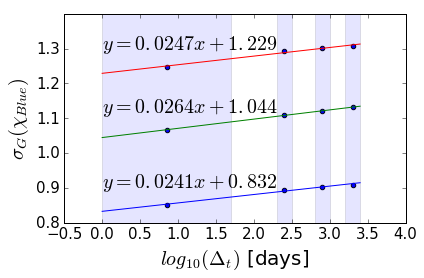

In [63]:
def func(x, a, b):
    return a * x + b

from scipy.optimize import curve_fit
# popt is func(x, popt*)

fig,ax = plt.subplots()

aCoeffArr = np.zeros(len(Min_arr))
bCoeffArr =np.zeros(len(Min_arr))
stdArr = np.zeros(len(Min_arr))
colors = ['']
for i in range(len(Min_arr)):
    tau_cen = (np.array(tau_max_arr) + np.array(tau_min_arr)) / 2.0
    popt, pcov = curve_fit(func, tau_cen, store_fc_starB[i,:])
    a,b = popt[0], popt[1]
    aCoeffArr[i] = a
    bCoeffArr[i] = b
    
    x = np.sort(np.append(np.array(tau_min_arr), tau_max_arr)) #np.linspace(tau_min_arr[0], tau_min_arr[-1])
    y = a * x + b
    std = np.std(a * np.array(tau_cen)  - store_fc_starB[i,:] )
    stdArr[i] = std
    ax.plot(x,y)
    ax.scatter(tau_cen, store_fc_starB[i,:])
    ax.text(x=0, y=store_fc_starB[i,0]+0.05,  s=r'$y='+str(a)[:6]+'x + '+str(b)[:5]+'$ ', fontsize=20)

for j in range(len(tau_min_arr)):
    ax.fill_between(x=[tau_min_arr[j],tau_max_arr[j]],y1=[0.8,0.8],y2=[1.4,1.4],alpha=0.1)

ax.set_ylim(0.8,1.4)
ax.set_xlabel(r'$log_{10} (\Delta _{t})$ [days]',fontsize=20)
ax.set_ylabel(r'$\sigma_{G}(\chi_{Blue})$',fontsize=20)
plt.tight_layout()
plt.savefig(outDir + 'Blue_Stars_coefficients.png')

In [137]:
# Store the linear correction coefficients 
data = np.column_stack((aCoeffArr, bCoeffArr, stdArr, Min_arr, Max_arr))
np.savetxt(outDir+'fc_starsB_a_b_coeff.txt',data, header='  a      b     stddev   rMagMin  rMagMax',fmt='%2.5f    %2.5f    %2.5f  %2.2f  %2.2f  ')
